# Análise de procedimentos hospitalares do SUS: valor total por Unidade Federativa

Neste notebook será feita a análise de custo total de procedimentos hospitalares, separados por Estado e medidos mensalmente.

Primeiro passo a ser realizado é importar as bibliotecas Pandas e MatplotLib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

A segunda etapa é realizar a leitura dos dados. Para este caso, foi usado o dataset "A225521189_28_143_208.csv", disponível no <a href="http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def">Datasus</a>

In [2]:
dados = pd.read_csv("A225521189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",", engine="python")
print(dados)

      Unidade da Federação     2008/Jan      2008/Fev      2008/Mar  \
0              11 Rondônia   1388528.39  2.931283e+06  1.541683e+06   
1                  12 Acre    902416.00  1.497206e+06  1.794028e+06   
2              13 Amazonas   4735529.42  7.118991e+06  8.196635e+06   
3               14 Roraima    657889.53  7.779393e+05  7.186880e+05   
4                  15 Pará  18864744.11  1.955376e+07  2.193734e+07   
5                 16 Amapá   1120973.34  1.268740e+06  9.746512e+05   
6             17 Tocantins   3441592.69  4.985689e+06  6.205613e+06   
7              21 Maranhão  10723506.39  1.355968e+07  1.398514e+07   
8                 22 Piauí   7985142.43  1.007993e+07  1.029837e+07   
9                 23 Ceará  15539821.90  2.573510e+07  2.872463e+07   
10  24 Rio Grande do Norte   5947814.08  9.509756e+06  1.035224e+07   
11              25 Paraíba  10723002.45  1.138627e+07  1.205364e+07   
12           26 Pernambuco  14393949.89  2.418140e+07  2.999130e+07   
13    

Como é possível verificar acima, os números estão sendo apresentados em notação científica. Para melhorar a legibilidade dos mesmos, vamos formatar globalmente o Pandas para formatar números de ponto flutuante com precisão de duas casas decimais.

In [3]:
pd.options.display.float_format = "{:.2f}".format

E agora nos certificamos que a formação está correta!

In [4]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

A partir daqui vamos começar a plotar alguns gráficos. Este primeiro plotará os dados referentes a Agosto de 2008, somente informando os eixos X e Y.

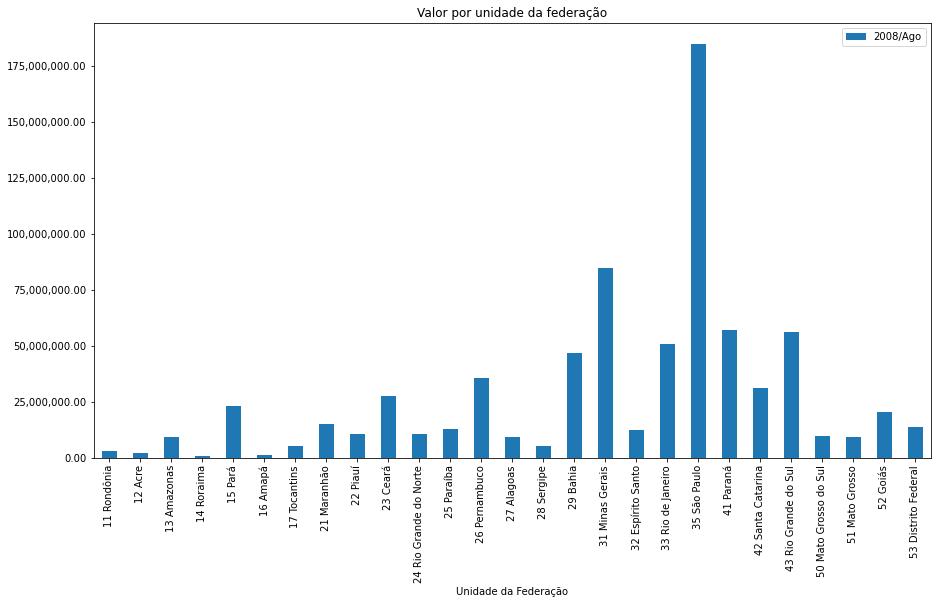

In [5]:
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize=(15,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor por unidade da federação")
plt.show()

É possível melhorar a exibição deste gráfico, começando por ordenar os valores e apresenta-los na horizontal, exibindo valores por milhão de reais.

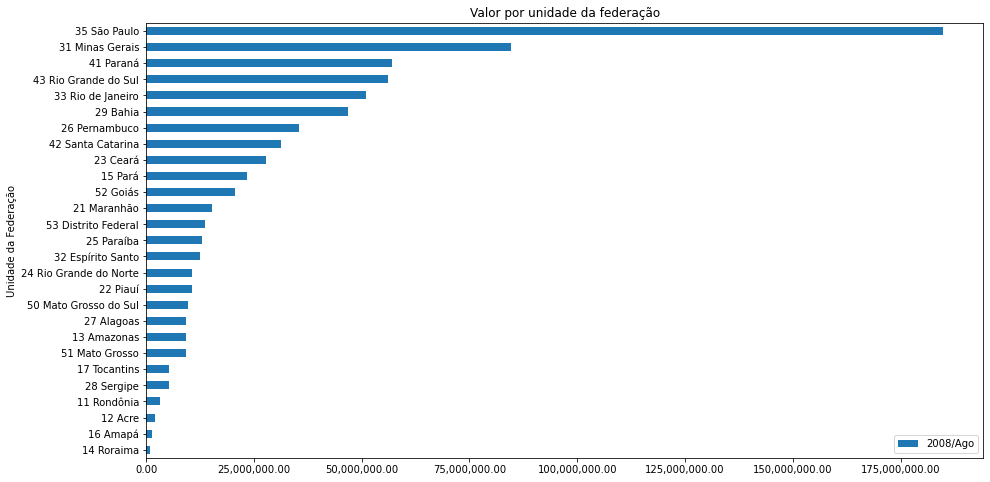

In [6]:
dados = dados.sort_values(by="2008/Ago", ascending=False)
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="barh", figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor por unidade da federação")
plt.show()

## Desafio 1

Para cumprir o primeiro desafio, segue o mesmo gráfico, porém com um título mais descritivo e o eixo de valores divido por um milhão, para facilitar a legibilidade.

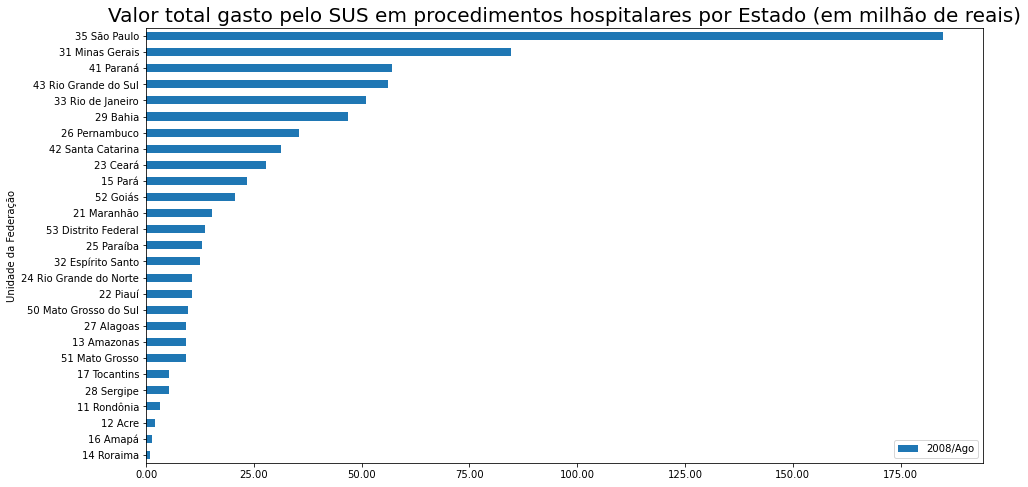

In [7]:
dados["2008/Ago"] /= 1000000
dados = dados.sort_values(by="2008/Ago", ascending=False)
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="barh", figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(label = "Valor total gasto pelo SUS em procedimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

## Desafio 2

Para cumprir o segundo desafio, precisaremos saber qual o mês mais recente disponível no dataset. Como os meses estão distribuídos em colunas, podemos realizar uma consulta no dataset para retornar, por exemplo, as últimas três colunas disponíveis.

In [8]:
dados[dados.columns[-3:]]
#dados.iloc[:, list(range(1)) + [-2]]

,2020/Jul,2020/Ago,Total
19,366721243.71,346512263.17,38929549655.89
16,164891823.64,168024412.95,19160106499.88
20,109658360.43,129375911.54,13786964617.27
22,100531035.83,101374341.51,11958647088.33
18,98722687.54,95274486.35,9696364115.11
15,83992134.91,80793117.08,9193802684.16
12,74192800.58,75704177.72,8046954289.39
21,63467828.84,63972379.36,7324100054.96
9,55180751.48,59808605.59,6197357245.98
4,38438873.79,39911193.02,4437115730.71


Dado o resultado acima, verificamos que o mês mais recente disponível para análise é Agosto de 2020. Então vamos replicar o gráfico feito anteriormente, atualizando o mês e ano.
Existe uma linha na coluna referente ao mês de agosto que contém um hífen no lugar de um valor numérico. Para evitar erros durante a execução do código, vamos substituir esta ocorrência por um zero e, em seguinda, plotar o gráfico.

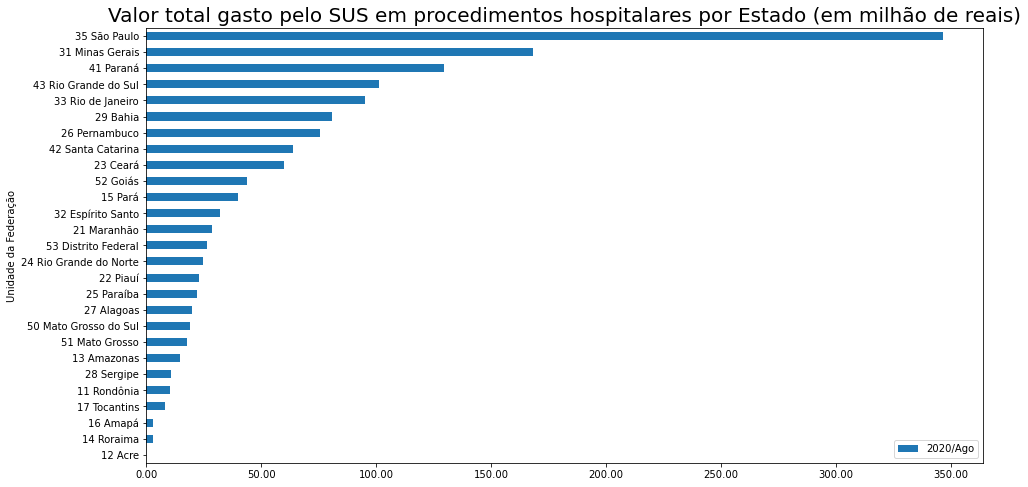

In [9]:
dados["2020/Ago"] = dados["2020/Ago"].str.replace(r'-', '0').astype(float)
dados["2020/Ago"] /= 1000000
dados = dados.sort_values(by="2020/Ago", ascending=False)
ax = dados.plot(x="Unidade da Federação", y="2020/Ago", kind="barh", figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(label = "Valor total gasto pelo SUS em procedimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

E aqui acabou a bagaça! :)